<a href="https://colab.research.google.com/github/Goncalotramps/fisica2_lab/blob/main/tratamento_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

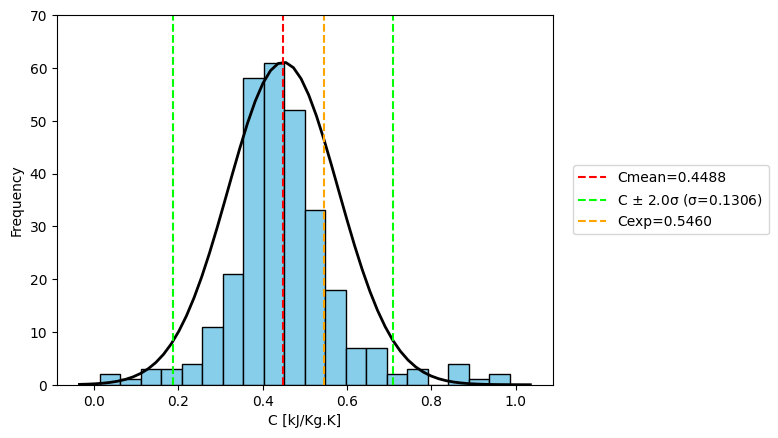

In [58]:

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from scipy.stats import norm
import statistics

#import columns A through C from Excel file
df = pd.read_excel('tratamento_estatistico.xlsx')

# Generate random data for the histogram
data = df["calor especifico"]

data= data[np.isfinite(data)]

# Plotting a basic histogram
plt.hist(data, bins=20, color='skyblue', edgecolor='black')

Cexp=0.546 #Put experimental value

n=2 #number of sigmas necessary to include our results
mu, std = norm.fit(data)


# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, mu, std)

plt.plot(x, p*20, 'k', linewidth=2)

plt.plot([mu,mu],[0,70],ls="--",c="red",label="Cmean={:.4f}".format(mu))
if n==1:
  labelsigma="C $\pm$ \u03C3 (\u03C3={:.4f})".format(n,std)
else:
  labelsigma="C $\pm$ {:.1f}\u03C3 (\u03C3={:.4f})".format(n,std)

plt.plot([mu-n*std,mu-n*std],[0,70],ls="--",c="lime",label=labelsigma)
plt.plot([mu+n*std,mu+n*std],[0,70],ls="--",c="lime")
plt.plot([Cexp,Cexp],[0,70],ls="--",c="orange",label=r"Cexp={:.4f}".format(Cexp))

plt.ylim(0,70)

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

# Adding labels and title
plt.xlabel('C [kJ/Kg.K]')
plt.ylabel('Frequency')


# Display the plot
plt.savefig("tratamento_dados.png")